In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.datasets import load_iris
import numpy
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
train = pd.read_csv("voice.csv")

In [3]:
df = train.copy()

In [4]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [5]:
Label = []

for i in df.label:
    if i=='male':
        Label.append(1)
    else:
        Label.append(0)

In [6]:
df.drop('label' , axis = 1 , inplace = True)

In [7]:
df['label'] = Label

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
df = scaler.transform(df)

In [9]:
mat = df

In [10]:
y = mat[: , 20]

In [11]:
encoding_train_y = np_utils.to_categorical(y , 2)

In [12]:
encoding_train_y

array([[ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       ..., 
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.]])

In [13]:
mat[: , 0:20]

array([[-4.04924806,  0.4273553 , -4.22490077, ..., -1.43142165,
        -1.41913712, -1.45477229],
       [-3.84105325,  0.6116695 , -3.99929342, ..., -1.41810716,
        -1.4058184 , -1.01410294],
       [-3.46306647,  1.60384791, -4.09585052, ..., -1.42920257,
        -1.41691733, -1.06534356],
       ..., 
       [-1.29877326,  2.32272355, -0.05197279, ..., -0.5992661 ,
        -0.58671739,  0.17588664],
       [-1.2452018 ,  2.012196  , -0.01772849, ..., -0.41286326,
        -0.40025537,  1.14916112],
       [-0.51474626,  2.14765111, -0.07087873, ..., -1.27608595,
        -1.2637521 ,  1.47567886]])

In [14]:
X = mat[: , 0:20]

In [15]:
X.shape

(3168, 20)

In [16]:
X_train , X_test  = train_test_split(X , test_size = 0.3)

In [17]:
y_train , y_test  = train_test_split(encoding_train_y , test_size = 0.3)

In [18]:
model = Sequential()
model.add(Dense(5, input_dim=20 , activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 105       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                96        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 34        
Total params: 235
Trainable params: 235
Non-trainable params: 0
_________________________________________________________________
None


In [19]:
from keras.optimizers import RMSprop, Adam
model.compile(optimizer = Adam(lr=0.001),loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
history = model.fit(X_train, y_train , epochs=5 , validation_data=(X_test, y_test))

Train on 2217 samples, validate on 951 samples
Epoch 1/5
2217/2217 [==============================] - 1s 677us/step - loss: 0.4373 - acc: 0.9479 - val_loss: 0.2311 - val_acc: 1.0000
Epoch 2/5
2217/2217 [==============================] - 0s 204us/step - loss: 0.1320 - acc: 1.0000 - val_loss: 0.0594 - val_acc: 1.0000
Epoch 3/5
2217/2217 [==============================] - 0s 169us/step - loss: 0.0370 - acc: 1.0000 - val_loss: 0.0205 - val_acc: 1.0000
Epoch 4/5
2217/2217 [==============================] - 0s 218us/step - loss: 0.0154 - acc: 1.0000 - val_loss: 0.0098 - val_acc: 1.0000
Epoch 5/5
2217/2217 [==============================] - 0s 141us/step - loss: 0.0082 - acc: 1.0000 - val_loss: 0.0057 - val_acc: 1.0000


In [21]:
scores = model.evaluate(X_test , y_test )
print("\nAccuracy: %.2f%%" % (scores[1]*100))

951/951 [==============================] - 0s 115us/step

Accuracy: 100.00%


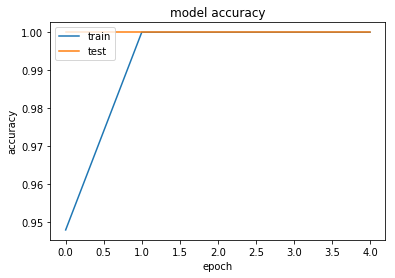

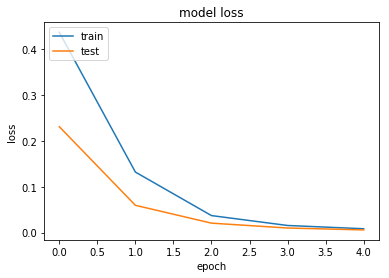

In [22]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()